In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import os
import missingno as msno
import warnings

In [2]:
path= "Clean_Files/"
files = [
    "clean_top_cross_bu_dnc_stim_stage_detail.xlsx",
    "clean_bot_cross_bu_dnc_stim_stage_detail.xlsx",
    "clean_gcbu_dnc_recompletions.xlsx",
    "clean_gcbu_dnc_stim_stage.xlsx",
    "clean_monthly_production.xlsx"
]

In [3]:
df_1_a = pd.read_excel(path + files[0])
df_1_b = pd.read_excel(path + files[1])
df_2 = pd.read_excel(path + files[2])
df_3 = pd.read_excel(path + files[3])
df_4 = pd.read_excel(path + files[4])

## File 2

In [4]:
qual_features = df_2.select_dtypes(include=[np.object])
qual_features.columns

Index(['#WELL_NAME', 'CURRENT_STATUS', 'JOB_CATEGORY', 'JOB_START_DATE',
       'JOB_END_DATE', 'JOB_STATUS', 'LIKE_KIND', 'PROJECT_TYPE',
       'PHASE_START_DATE', 'PHASE_END_DATE', 'PHASE', 'JOB_OP_CODE', 'RIG_ID',
       'RIG_ACCEPT_DATE', 'RIG_RELEASE_DATE', 'RIG_TYPE', 'CONTRACTOR',
       'REPORT_START_DATE', 'REPORT_END_DATE', 'STIMULATION_TREAT_DATE',
       'STIMULATION_TREAT_TYPE', 'STIM_TREAT_COMPANY', 'STIM_TREAT_SUPERVISOR',
       'DIVERSION_COMPANY', 'DIVERSION_METHOD', 'DELIVERY_MODE',
       'BOTTOM_HOLE_PRESSURE_METHOD', 'CLOSURE_PRESSURE_METHOD',
       'STIMULATION_RESULT', 'STIMULATION_RESULT_DETAIL', 'STG_START_DATE',
       'STG_END_DATE', 'STIMTREAT_ID', 'FLUID_NAME', 'SITE_SUPERVISOR',
       'STIM_TREAT_REMARK', 'STG_REMARK'],
      dtype='object')

In [5]:
qual_features.head()

,#WELL_NAME,CURRENT_STATUS,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,PHASE_START_DATE,PHASE_END_DATE,...,CLOSURE_PRESSURE_METHOD,STIMULATION_RESULT,STIMULATION_RESULT_DETAIL,STG_START_DATE,STG_END_DATE,STIMTREAT_ID,FLUID_NAME,SITE_SUPERVISOR,STIM_TREAT_REMARK,STG_REMARK
0,WELL - 2019000699,Producing,COMPLETIONS,12/16/2018 06:00:00,10/12/2019 10:00:00,COMPLETED,OCM - MECHANICAL ISOLATION,RECOMPLETION,01/11/2019 06:00:00,02/06/2019 07:00:00,...,NaN,Success,According to Plan,01/28/2019 08:05:00,01/28/2019 10:05:00,A6066AE1E85F4B1DB15D9940B5FBBEBF,Slickwater,MIKE HOOSE,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...
1,WELL - 2019000665,Producing,COMPLETIONS,01/21/2018 10:00:00,10/09/2018 07:00:00,COMPLETED,OCM - PP TUB,RECOMPLETION,01/27/2018 06:00:00,02/23/2018 18:00:00,...,NaN,Success,According to Plan,02/19/2018 14:40:00,02/20/2018 00:19:00,6ACEA3AEC54E415B8251B86897A229F3,FRESH WATER,NaN,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...
2,WELL - 2019000347,Producing,COMPLETIONS,08/31/2017 13:00:00,NaN,NaN,OCM - PP PUC,RECOMPLETION,09/07/2017 00:00:00,10/29/2017 17:00:00,...,Nolte-Smith Calc,Success,According to Plan,10/26/2017 10:13:00,10/26/2017 12:45:00,29626CB5494D45ACB9C7723B028E9DEF,Slick Water,NaN,STAGE: 2 FRAC OPSTART TIME: 10:13 HRS FI...,STAGE: 2 FRAC OPSTART TIME: 10:13 HRS FI...
3,WELL - 2019001412,Producing,COMPLETIONS,02/13/2019 07:30:00,NaN,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,03/04/2019 16:30:00,04/14/2019 16:00:00,...,NaN,Success,According to Plan,03/25/2019 14:05:00,03/25/2019 15:34:00,DCCB82735EEA4540A1C0C402180C5A45,FRP-1S,CHRIS SANCHEZ,STAGE: 1 FRAC OPERATIONSSTART TIME: 14:05 HRS...,STAGE: 1 FRAC OPERATIONSSTART TIME: 14:05 HRS...
4,WELL - 2019001390,Producing,COMPLETIONS,04/04/2019 07:30:00,06/15/2019 18:00:00,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,04/23/2019 07:00:00,06/15/2019 18:00:00,...,NaN,Success,According to Plan,06/13/2019 07:17:00,06/13/2019 09:19:00,B8733A01BFFD46CC8CCDE726BD4B484B,FRP-1S,JW KRAMER,STAGE: 27 RE-FRAC OPERATIONSSTART TIME: 07:1...,STAGE: 27 RE-FRAC OPERATIONSSTART TIME: 07:1...


In [6]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 #WELL_NAME:   67
             CURRENT_STATUS:    1
               JOB_CATEGORY:    1
             JOB_START_DATE:   67
               JOB_END_DATE:   27
                 JOB_STATUS:    3
                  LIKE_KIND:    5
               PROJECT_TYPE:    1
           PHASE_START_DATE:   67
             PHASE_END_DATE:   60
                      PHASE:    1
                JOB_OP_CODE:    1
                     RIG_ID:    7
            RIG_ACCEPT_DATE:   63
           RIG_RELEASE_DATE:   64
                   RIG_TYPE:    2
                 CONTRACTOR:    5
          REPORT_START_DATE:  286
            REPORT_END_DATE:  286
     STIMULATION_TREAT_DATE: 1653
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
      STIM_TREAT_SUPERVISOR:   28
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
    CLOSURE_PRESSURE_METHOD:    3
         STIMULATION_RESULT:    3
  STIMULATION_

In [7]:
# Getting rid of dates as these will be handled 
# differently from other qualitative features
cur_features = [feature for feature in qual_features if not "DATE" in feature]
cur_features

['#WELL_NAME',
 'CURRENT_STATUS',
 'JOB_CATEGORY',
 'JOB_STATUS',
 'LIKE_KIND',
 'PROJECT_TYPE',
 'PHASE',
 'JOB_OP_CODE',
 'RIG_ID',
 'RIG_TYPE',
 'CONTRACTOR',
 'STIMULATION_TREAT_TYPE',
 'STIM_TREAT_COMPANY',
 'STIM_TREAT_SUPERVISOR',
 'DIVERSION_COMPANY',
 'DIVERSION_METHOD',
 'DELIVERY_MODE',
 'BOTTOM_HOLE_PRESSURE_METHOD',
 'CLOSURE_PRESSURE_METHOD',
 'STIMULATION_RESULT',
 'STIMULATION_RESULT_DETAIL',
 'STIMTREAT_ID',
 'FLUID_NAME',
 'SITE_SUPERVISOR',
 'STIM_TREAT_REMARK',
 'STG_REMARK']

In [8]:
qual_features = df_2[cur_features]

In [9]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 #WELL_NAME:   67
             CURRENT_STATUS:    1
               JOB_CATEGORY:    1
                 JOB_STATUS:    3
                  LIKE_KIND:    5
               PROJECT_TYPE:    1
                      PHASE:    1
                JOB_OP_CODE:    1
                     RIG_ID:    7
                   RIG_TYPE:    2
                 CONTRACTOR:    5
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
      STIM_TREAT_SUPERVISOR:   28
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
    CLOSURE_PRESSURE_METHOD:    3
         STIMULATION_RESULT:    3
  STIMULATION_RESULT_DETAIL:    4
               STIMTREAT_ID: 1654
                 FLUID_NAME:   40
            SITE_SUPERVISOR:   69
          STIM_TREAT_REMARK: 1654
                 STG_REMARK: 1654


In [10]:
# If a qualitative feature only has 1 unique element, then delete
single_element = [feature for feature in qual_features if len(qual_features[feature].unique()) != 1]
single_element

['#WELL_NAME',
 'JOB_STATUS',
 'LIKE_KIND',
 'RIG_ID',
 'RIG_TYPE',
 'CONTRACTOR',
 'STIMULATION_TREAT_TYPE',
 'STIM_TREAT_COMPANY',
 'STIM_TREAT_SUPERVISOR',
 'DIVERSION_COMPANY',
 'DIVERSION_METHOD',
 'DELIVERY_MODE',
 'BOTTOM_HOLE_PRESSURE_METHOD',
 'CLOSURE_PRESSURE_METHOD',
 'STIMULATION_RESULT',
 'STIMULATION_RESULT_DETAIL',
 'STIMTREAT_ID',
 'FLUID_NAME',
 'SITE_SUPERVISOR',
 'STIM_TREAT_REMARK',
 'STG_REMARK']

In [11]:
qual_features = df_2[single_element]
qual_features

,#WELL_NAME,JOB_STATUS,LIKE_KIND,RIG_ID,RIG_TYPE,CONTRACTOR,STIMULATION_TREAT_TYPE,STIM_TREAT_COMPANY,STIM_TREAT_SUPERVISOR,DIVERSION_COMPANY,...,DELIVERY_MODE,BOTTOM_HOLE_PRESSURE_METHOD,CLOSURE_PRESSURE_METHOD,STIMULATION_RESULT,STIMULATION_RESULT_DETAIL,STIMTREAT_ID,FLUID_NAME,SITE_SUPERVISOR,STIM_TREAT_REMARK,STG_REMARK
0,WELL - 2019000699,COMPLETED,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000082,FRAC EQUIP,CONTRACTOR - 2019000027,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000004,NaN,DIVERSION_COMPANY - 2019000007,...,Casing,NaN,NaN,Success,According to Plan,A6066AE1E85F4B1DB15D9940B5FBBEBF,Slickwater,MIKE HOOSE,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...
1,WELL - 2019000665,COMPLETED,OCM - PP TUB,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,JEFF,DIVERSION_COMPANY - 2019000037,...,Casing,NaN,NaN,Success,According to Plan,6ACEA3AEC54E415B8251B86897A229F3,FRESH WATER,NaN,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...
2,WELL - 2019000347,NaN,OCM - PP PUC,RIG_ID - 2019000084,FRAC EQUIP,CONTRACTOR - 2019000027,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000004,STG 27,DIVERSION_COMPANY - 2019000003,...,Casing,Calculated,Nolte-Smith Calc,Success,According to Plan,29626CB5494D45ACB9C7723B028E9DEF,Slick Water,NaN,STAGE: 2 FRAC OPSTART TIME: 10:13 HRS FI...,STAGE: 2 FRAC OPSTART TIME: 10:13 HRS FI...
3,WELL - 2019001412,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,...,Casing,NaN,NaN,Success,According to Plan,DCCB82735EEA4540A1C0C402180C5A45,FRP-1S,CHRIS SANCHEZ,STAGE: 1 FRAC OPERATIONSSTART TIME: 14:05 HRS...,STAGE: 1 FRAC OPERATIONSSTART TIME: 14:05 HRS...
4,WELL - 2019001390,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,NaN,...,Casing,NaN,NaN,Success,According to Plan,B8733A01BFFD46CC8CCDE726BD4B484B,FRP-1S,JW KRAMER,STAGE: 27 RE-FRAC OPERATIONSSTART TIME: 07:1...,STAGE: 27 RE-FRAC OPERATIONSSTART TIME: 07:1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,...,Casing,NaN,NaN,Success,According to Plan,3378EA55ECFB4D998B852424A305E2BF,Slickwater,SEAN CHANCE,STAGE: 50 FRAC OPERATIONSSTART TIME: 15:26 HRS...,STAGE: 50 FRAC OPERATIONSSTART TIME: 15:26 HRS...
1650,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,...,Casing,NaN,NaN,Success,According to Plan,D59E4DC0E1654C11B392325DACBEBD11,Slickwater,NATHAN JAYROE,STAGE: 51 FRAC OPERATIONSSTART TIME: 18:21 HRS...,STAGE: 51 FRAC OPERATIONSSTART TIME: 18:21 HRS...
1651,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,...,Casing,NaN,NaN,Success,According to Plan,4BC64FC4AF8E463989399F926EFD55D2,Slickwater,NATHAN JAYROE,STAGE: 52 FRAC OPERATIONSSTART TIME: 21:27 HRS...,STAGE: 52 FRAC OPERATIONSSTART TIME: 21:27 HRS...
1652,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,...,Casing,NaN,NaN,Success,According to Plan,C464F9B9992947379161C633C1822EA9,Slickwater,NATHAN JAYROE,STAGE: 53 FRAC OPERATIONSSTART TIME: 00:30 HRS...,STAGE: 53 FRAC OPERATIONSSTART TIME: 00:30 HRS...


In [12]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 #WELL_NAME:   67
                 JOB_STATUS:    3
                  LIKE_KIND:    5
                     RIG_ID:    7
                   RIG_TYPE:    2
                 CONTRACTOR:    5
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
      STIM_TREAT_SUPERVISOR:   28
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
    CLOSURE_PRESSURE_METHOD:    3
         STIMULATION_RESULT:    3
  STIMULATION_RESULT_DETAIL:    4
               STIMTREAT_ID: 1654
                 FLUID_NAME:   40
            SITE_SUPERVISOR:   69
          STIM_TREAT_REMARK: 1654
                 STG_REMARK: 1654


In [13]:
to_remove = [
    "#WELL_NAME",
    "SITE_SUPERVISOR",
    "STIM_TREAT_SUPERVISOR",
    "STIMTREAT_ID",
    "STIM_TREAT_REMARK",
    "STG_REMARK"
]

qual_features = qual_features.drop(columns = to_remove)

In [14]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 JOB_STATUS:    3
                  LIKE_KIND:    5
                     RIG_ID:    7
                   RIG_TYPE:    2
                 CONTRACTOR:    5
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
    CLOSURE_PRESSURE_METHOD:    3
         STIMULATION_RESULT:    3
  STIMULATION_RESULT_DETAIL:    4
                 FLUID_NAME:   40


In [15]:
qual_features.columns

Index(['JOB_STATUS', 'LIKE_KIND', 'RIG_ID', 'RIG_TYPE', 'CONTRACTOR',
       'STIMULATION_TREAT_TYPE', 'STIM_TREAT_COMPANY', 'DIVERSION_COMPANY',
       'DIVERSION_METHOD', 'DELIVERY_MODE', 'BOTTOM_HOLE_PRESSURE_METHOD',
       'CLOSURE_PRESSURE_METHOD', 'STIMULATION_RESULT',
       'STIMULATION_RESULT_DETAIL', 'FLUID_NAME'],
      dtype='object')

In [16]:
for feature in qual_features.columns:
    qual_features[feature] = qual_features[feature].astype('category')

In [17]:
qual_features.dtypes

JOB_STATUS                     category
LIKE_KIND                      category
RIG_ID                         category
RIG_TYPE                       category
CONTRACTOR                     category
STIMULATION_TREAT_TYPE         category
STIM_TREAT_COMPANY             category
DIVERSION_COMPANY              category
DIVERSION_METHOD               category
DELIVERY_MODE                  category
BOTTOM_HOLE_PRESSURE_METHOD    category
CLOSURE_PRESSURE_METHOD        category
STIMULATION_RESULT             category
STIMULATION_RESULT_DETAIL      category
FLUID_NAME                     category
dtype: object

In [18]:
cat_features = pd.DataFrame(columns=qual_features.columns)
for feature in cat_features:
    cat_features[feature] = qual_features[feature].cat.codes
cat_features

,JOB_STATUS,LIKE_KIND,RIG_ID,RIG_TYPE,CONTRACTOR,STIMULATION_TREAT_TYPE,STIM_TREAT_COMPANY,DIVERSION_COMPANY,DIVERSION_METHOD,DELIVERY_MODE,BOTTOM_HOLE_PRESSURE_METHOD,CLOSURE_PRESSURE_METHOD,STIMULATION_RESULT,STIMULATION_RESULT_DETAIL,FLUID_NAME
0,0,1,2,1,2,3,2,2,8,0,-1,-1,1,0,33
1,0,3,5,1,3,3,3,11,15,0,-1,-1,1,0,20
2,-1,2,3,1,2,3,2,0,5,0,0,0,1,0,32
3,-1,1,5,1,3,3,3,2,8,0,-1,-1,1,0,24
4,-1,1,5,1,3,3,3,-1,8,0,-1,-1,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,-1,1,5,1,3,3,3,2,8,0,-1,-1,1,0,33
1650,-1,1,5,1,3,3,3,2,8,0,-1,-1,1,0,33
1651,-1,1,5,1,3,3,3,2,8,0,-1,-1,1,0,33
1652,-1,1,5,1,3,3,3,2,8,0,-1,-1,1,0,33


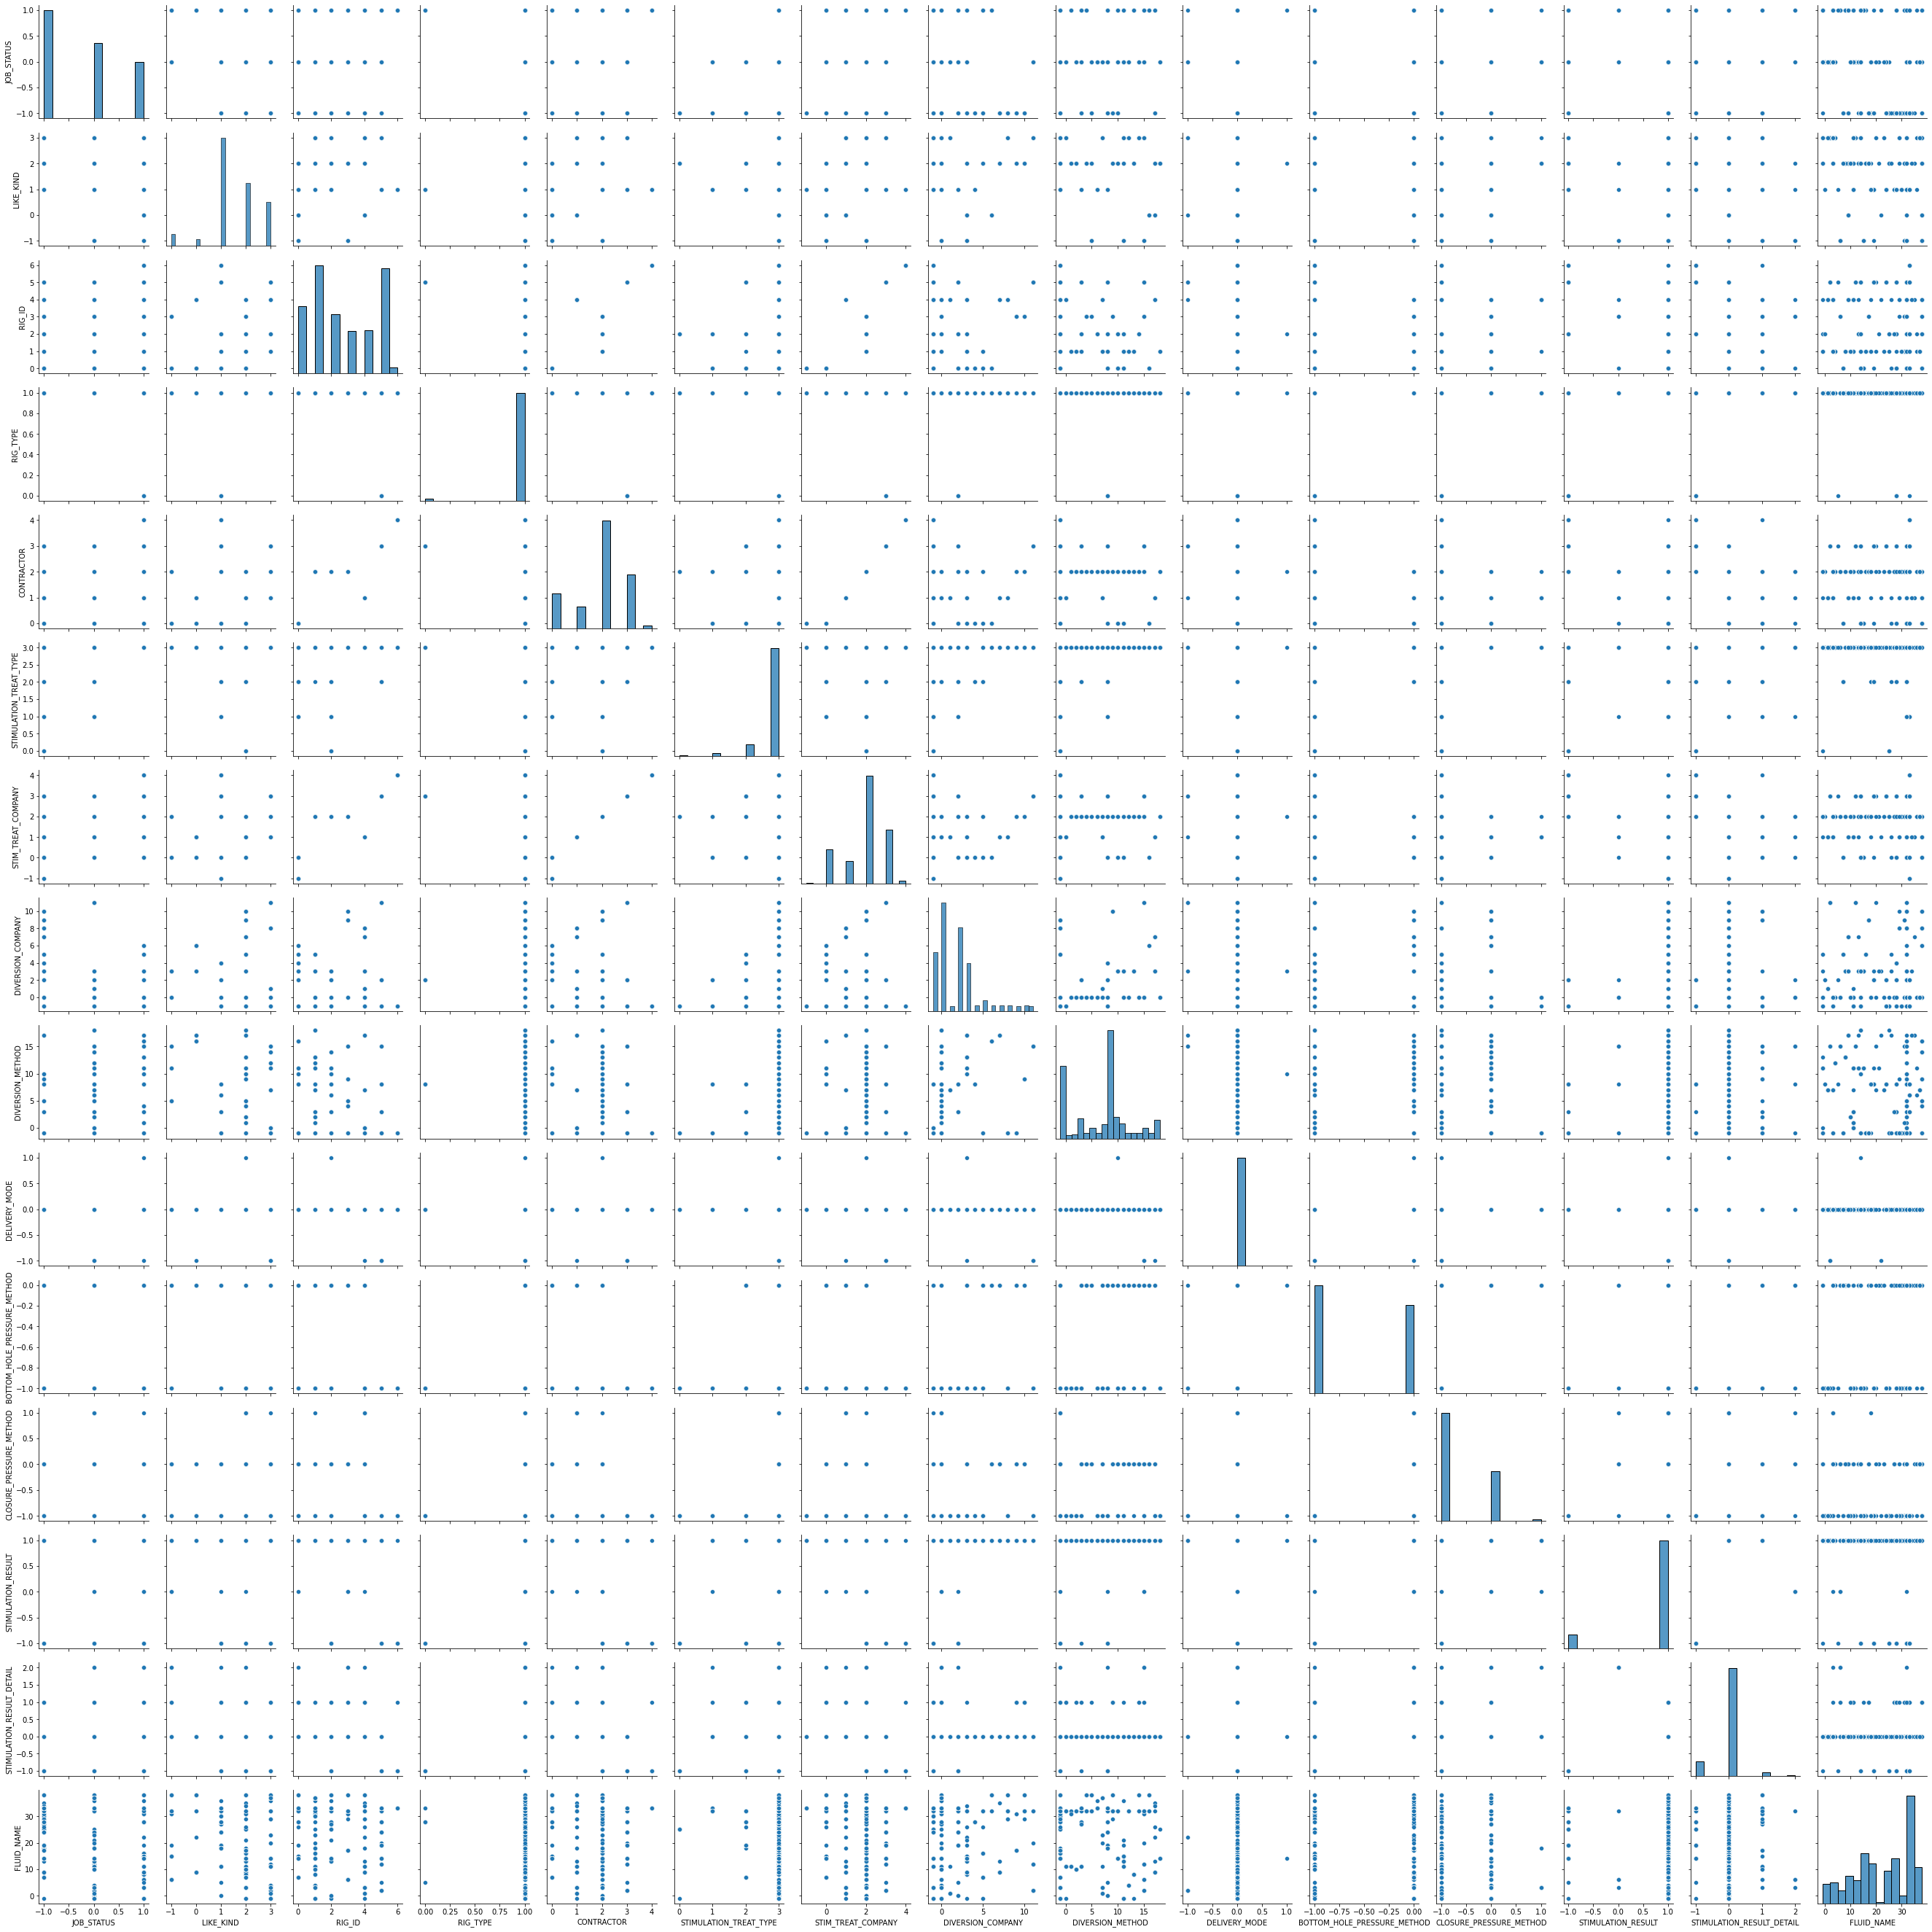

In [19]:
g = sns.pairplot(cat_features)

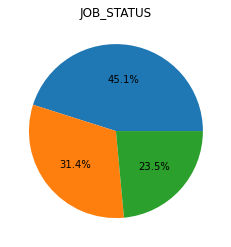

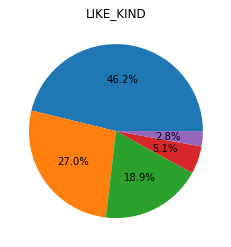

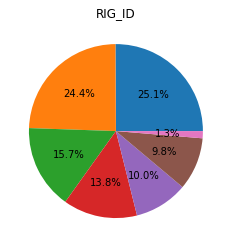

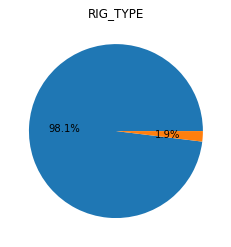

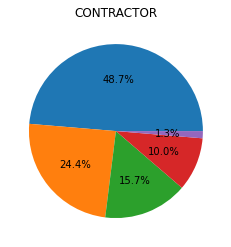

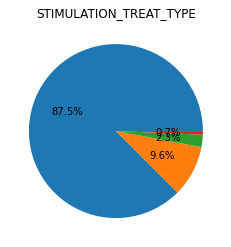

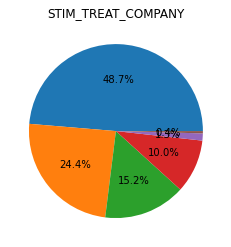

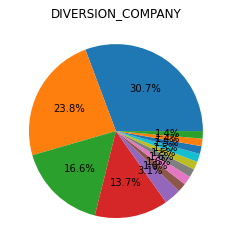

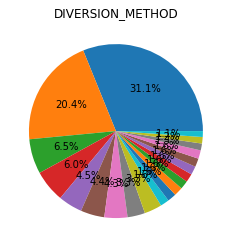

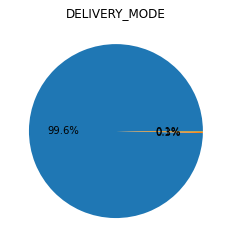

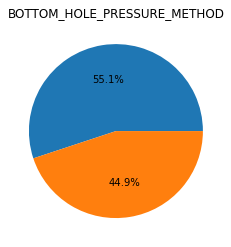

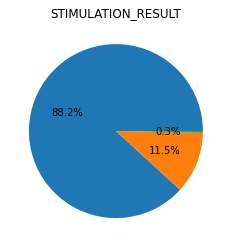

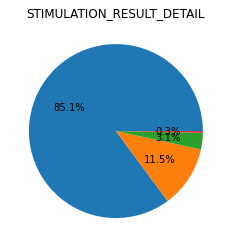

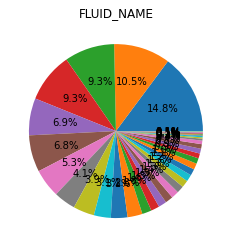

In [40]:
chart_count = 0
for feature in cat_features:
    cur_feature = pd.Series(cat_features[feature].to_list())
    cur_counts = cur_feature.value_counts().to_frame()[0].to_list()
    plt.title(feature)
    plt.pie(cur_counts, autopct="%1.1f%%")
    plt.show()
    chart_count += 1

In [21]:
chart_count

15

## File 3

In [22]:
qual_features = df_3.select_dtypes(include=[np.object])
qual_features.columns

Index(['#WELL_NAME', 'CURRENT_STATUS', 'JOB_CATEGORY', 'JOB_START_DATE',
       'JOB_END_DATE', 'JOB_STATUS', 'LIKE_KIND', 'PROJECT_TYPE',
       'PHASE_START_DATE', 'PHASE_END_DATE', 'PHASE', 'JOB_OP_CODE', 'RIG_ID',
       'RIG_ACCEPT_DATE', 'RIG_RELEASE_DATE', 'RIG_TYPE', 'CONTRACTOR',
       'REPORT_START_DATE', 'REPORT_END_DATE', 'STIMULATION_TREAT_DATE',
       'STIMULATION_TREAT_TYPE', 'STIM_TREAT_COMPANY', 'STIM_TREAT_SUPERVISOR',
       'DIVERSION_COMPANY', 'DIVERSION_METHOD', 'DELIVERY_MODE',
       'BOTTOM_HOLE_PRESSURE_METHOD', 'STIMULATION_RESULT',
       'STIMULATION_RESULT_DETAIL', 'STG_START_DATE', 'STG_END_DATE',
       'STIMTREAT_ID', 'FLUID_NAME', 'STIM_TREAT_REMARK', 'STG_REMARK'],
      dtype='object')

In [23]:
qual_features.head()

,#WELL_NAME,CURRENT_STATUS,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,PHASE_START_DATE,PHASE_END_DATE,...,DELIVERY_MODE,BOTTOM_HOLE_PRESSURE_METHOD,STIMULATION_RESULT,STIMULATION_RESULT_DETAIL,STG_START_DATE,STG_END_DATE,STIMTREAT_ID,FLUID_NAME,STIM_TREAT_REMARK,STG_REMARK
0,WELL - 2019000507,Producing,COMPLETIONS,04/10/2017 00:00:00,04/26/2018 09:30:00,COMPLETED,OCM - PP PUC,INITIAL COMPLETION,04/14/2017 17:15:00,08/19/2017 18:00:00,...,Casing,NaN,Success,According to Plan,07/27/2017 02:31:00,07/27/2017 04:31:00,6652C6217F11405488E785A3D84CFD56,25# XL,STAGE 1 FRAC OPSSTART TIME: 02:31 HRS FI...,STAGE 1 FRAC OPSSTART TIME: 02:31 HRS FI...
1,WELL - 2019000477,Producing,COMPLETIONS,12/06/2017 07:00:00,08/06/2018 18:00:00,NaN,OCM - PP PUC,INITIAL COMPLETION,12/11/2017 17:00:00,02/09/2018 09:00:00,...,Casing,Calculated,Success,According to Plan,01/23/2018 20:33:00,01/23/2018 21:22:00,9808C6BE9B2746A9A63D58EEB3885939,25# GUAR BORATE,STAGE: 1 FRAC OPERATIONSSTART TIME: 20:33 HRS ...,STAGE: 1 FRAC OPERATIONSSTART TIME: 20:33 HRS ...
2,WELL - 2019000699,Producing,COMPLETIONS,12/16/2018 06:00:00,10/12/2019 10:00:00,COMPLETED,OCM - MECHANICAL ISOLATION,RECOMPLETION,01/11/2019 06:00:00,02/06/2019 07:00:00,...,Casing,NaN,Success,According to Plan,01/28/2019 08:05:00,01/28/2019 10:05:00,A6066AE1E85F4B1DB15D9940B5FBBEBF,Slickwater,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...
3,WELL - 2019000665,Producing,COMPLETIONS,01/21/2018 10:00:00,10/09/2018 07:00:00,COMPLETED,OCM - PP TUB,RECOMPLETION,01/27/2018 06:00:00,02/23/2018 18:00:00,...,Casing,NaN,Success,According to Plan,02/19/2018 14:40:00,02/20/2018 00:19:00,6ACEA3AEC54E415B8251B86897A229F3,FRESH WATER,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...
4,WELL - 2019000466,Producing,COMPLETIONS,08/01/2017 06:00:00,NaN,PRODUCING,OCM - PP PUC,INITIAL COMPLETION,08/25/2017 06:00:00,10/05/2017 06:00:00,...,Casing,NaN,Success,According to Plan,09/11/2017 13:35:00,09/11/2017 15:33:00,0459426A0021476CADD000E29A193E8D,Slick Water,STAGE 1 FRAC OPSSTART TIME: 13:35 HRS FI...,STAGE 1 FRAC OPSSTART TIME: 13:35 HRS FI...


In [24]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 #WELL_NAME:  459
             CURRENT_STATUS:    3
               JOB_CATEGORY:    1
             JOB_START_DATE:  178
               JOB_END_DATE:  171
                 JOB_STATUS:    4
                  LIKE_KIND:    7
               PROJECT_TYPE:    2
           PHASE_START_DATE:  247
             PHASE_END_DATE:  241
                      PHASE:    1
                JOB_OP_CODE:    1
                     RIG_ID:    7
            RIG_ACCEPT_DATE:  311
           RIG_RELEASE_DATE:  329
                   RIG_TYPE:    5
                 CONTRACTOR:    5
          REPORT_START_DATE:  999
            REPORT_END_DATE: 1055
     STIMULATION_TREAT_DATE: 17433
     STIMULATION_TREAT_TYPE:    6
         STIM_TREAT_COMPANY:    6
      STIM_TREAT_SUPERVISOR:   88
          DIVERSION_COMPANY:   26
           DIVERSION_METHOD:   25
              DELIVERY_MODE:    4
BOTTOM_HOLE_PRESSURE_METHOD:    2
         STIMULATION_RESULT:    7
  STIMULATION_RESULT_DETAIL:   21
             

In [25]:
# Getting rid of dates as these will be handled 
# differently from other qualitative features
cur_features = [feature for feature in qual_features if not "DATE" in feature]
cur_features

['#WELL_NAME',
 'CURRENT_STATUS',
 'JOB_CATEGORY',
 'JOB_STATUS',
 'LIKE_KIND',
 'PROJECT_TYPE',
 'PHASE',
 'JOB_OP_CODE',
 'RIG_ID',
 'RIG_TYPE',
 'CONTRACTOR',
 'STIMULATION_TREAT_TYPE',
 'STIM_TREAT_COMPANY',
 'STIM_TREAT_SUPERVISOR',
 'DIVERSION_COMPANY',
 'DIVERSION_METHOD',
 'DELIVERY_MODE',
 'BOTTOM_HOLE_PRESSURE_METHOD',
 'STIMULATION_RESULT',
 'STIMULATION_RESULT_DETAIL',
 'STIMTREAT_ID',
 'FLUID_NAME',
 'STIM_TREAT_REMARK',
 'STG_REMARK']

In [26]:
qual_features = df_2[cur_features]

In [27]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 #WELL_NAME:   67
             CURRENT_STATUS:    1
               JOB_CATEGORY:    1
                 JOB_STATUS:    3
                  LIKE_KIND:    5
               PROJECT_TYPE:    1
                      PHASE:    1
                JOB_OP_CODE:    1
                     RIG_ID:    7
                   RIG_TYPE:    2
                 CONTRACTOR:    5
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
      STIM_TREAT_SUPERVISOR:   28
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
         STIMULATION_RESULT:    3
  STIMULATION_RESULT_DETAIL:    4
               STIMTREAT_ID: 1654
                 FLUID_NAME:   40
          STIM_TREAT_REMARK: 1654
                 STG_REMARK: 1654


In [28]:
# If a qualitative feature only has 1 unique element, then delete
single_element = [feature for feature in qual_features if len(qual_features[feature].unique()) != 1]
single_element

['#WELL_NAME',
 'JOB_STATUS',
 'LIKE_KIND',
 'RIG_ID',
 'RIG_TYPE',
 'CONTRACTOR',
 'STIMULATION_TREAT_TYPE',
 'STIM_TREAT_COMPANY',
 'STIM_TREAT_SUPERVISOR',
 'DIVERSION_COMPANY',
 'DIVERSION_METHOD',
 'DELIVERY_MODE',
 'BOTTOM_HOLE_PRESSURE_METHOD',
 'STIMULATION_RESULT',
 'STIMULATION_RESULT_DETAIL',
 'STIMTREAT_ID',
 'FLUID_NAME',
 'STIM_TREAT_REMARK',
 'STG_REMARK']

In [29]:
qual_features = df_2[single_element]
qual_features

,#WELL_NAME,JOB_STATUS,LIKE_KIND,RIG_ID,RIG_TYPE,CONTRACTOR,STIMULATION_TREAT_TYPE,STIM_TREAT_COMPANY,STIM_TREAT_SUPERVISOR,DIVERSION_COMPANY,DIVERSION_METHOD,DELIVERY_MODE,BOTTOM_HOLE_PRESSURE_METHOD,STIMULATION_RESULT,STIMULATION_RESULT_DETAIL,STIMTREAT_ID,FLUID_NAME,STIM_TREAT_REMARK,STG_REMARK
0,WELL - 2019000699,COMPLETED,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000082,FRAC EQUIP,CONTRACTOR - 2019000027,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000004,NaN,DIVERSION_COMPANY - 2019000007,Frac Plug,Casing,NaN,Success,According to Plan,A6066AE1E85F4B1DB15D9940B5FBBEBF,Slickwater,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...,STAGE: 1 FRAC OPERATIONSSTART TIME: 0805 HRS ...
1,WELL - 2019000665,COMPLETED,OCM - PP TUB,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,JEFF,DIVERSION_COMPANY - 2019000037,SILICA FLOUR,Casing,NaN,Success,According to Plan,6ACEA3AEC54E415B8251B86897A229F3,FRESH WATER,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...,STAGE: 1 REFRAC OPERATIONSSTART TIME: 14:40 HR...
2,WELL - 2019000347,NaN,OCM - PP PUC,RIG_ID - 2019000084,FRAC EQUIP,CONTRACTOR - 2019000027,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000004,STG 27,DIVERSION_COMPANY - 2019000003,Ball 40 7/8 BIO,Casing,Calculated,Success,According to Plan,29626CB5494D45ACB9C7723B028E9DEF,Slick Water,STAGE: 2 FRAC OPSTART TIME: 10:13 HRS FI...,STAGE: 2 FRAC OPSTART TIME: 10:13 HRS FI...
3,WELL - 2019001412,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,Frac Plug,Casing,NaN,Success,According to Plan,DCCB82735EEA4540A1C0C402180C5A45,FRP-1S,STAGE: 1 FRAC OPERATIONSSTART TIME: 14:05 HRS...,STAGE: 1 FRAC OPERATIONSSTART TIME: 14:05 HRS...
4,WELL - 2019001390,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,NaN,Frac Plug,Casing,NaN,Success,According to Plan,B8733A01BFFD46CC8CCDE726BD4B484B,FRP-1S,STAGE: 27 RE-FRAC OPERATIONSSTART TIME: 07:1...,STAGE: 27 RE-FRAC OPERATIONSSTART TIME: 07:1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,Frac Plug,Casing,NaN,Success,According to Plan,3378EA55ECFB4D998B852424A305E2BF,Slickwater,STAGE: 50 FRAC OPERATIONSSTART TIME: 15:26 HRS...,STAGE: 50 FRAC OPERATIONSSTART TIME: 15:26 HRS...
1650,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,Frac Plug,Casing,NaN,Success,According to Plan,D59E4DC0E1654C11B392325DACBEBD11,Slickwater,STAGE: 51 FRAC OPERATIONSSTART TIME: 18:21 HRS...,STAGE: 51 FRAC OPERATIONSSTART TIME: 18:21 HRS...
1651,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,Frac Plug,Casing,NaN,Success,According to Plan,4BC64FC4AF8E463989399F926EFD55D2,Slickwater,STAGE: 52 FRAC OPERATIONSSTART TIME: 21:27 HRS...,STAGE: 52 FRAC OPERATIONSSTART TIME: 21:27 HRS...
1652,WELL - 2019000628,NaN,OCM - MECHANICAL ISOLATION,RIG_ID - 2019000098,FRAC EQUIP,CONTRACTOR - 2019000030,Hydraulic Fracture,STIM_TREAT_COMPANY - 2019000005,NaN,DIVERSION_COMPANY - 2019000007,Frac Plug,Casing,NaN,Success,According to Plan,C464F9B9992947379161C633C1822EA9,Slickwater,STAGE: 53 FRAC OPERATIONSSTART TIME: 00:30 HRS...,STAGE: 53 FRAC OPERATIONSSTART TIME: 00:30 HRS...


In [30]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 #WELL_NAME:   67
                 JOB_STATUS:    3
                  LIKE_KIND:    5
                     RIG_ID:    7
                   RIG_TYPE:    2
                 CONTRACTOR:    5
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
      STIM_TREAT_SUPERVISOR:   28
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
         STIMULATION_RESULT:    3
  STIMULATION_RESULT_DETAIL:    4
               STIMTREAT_ID: 1654
                 FLUID_NAME:   40
          STIM_TREAT_REMARK: 1654
                 STG_REMARK: 1654


In [31]:
to_remove = [
    "#WELL_NAME",
    "STIM_TREAT_SUPERVISOR",
    "STIMTREAT_ID",
    "STIM_TREAT_REMARK",
    "STG_REMARK"
]

qual_features = qual_features.drop(columns = to_remove)

In [32]:
for feature in qual_features:
    print("%27s: %4d" % (feature, len(qual_features[feature].unique())))

                 JOB_STATUS:    3
                  LIKE_KIND:    5
                     RIG_ID:    7
                   RIG_TYPE:    2
                 CONTRACTOR:    5
     STIMULATION_TREAT_TYPE:    4
         STIM_TREAT_COMPANY:    6
          DIVERSION_COMPANY:   13
           DIVERSION_METHOD:   20
              DELIVERY_MODE:    3
BOTTOM_HOLE_PRESSURE_METHOD:    2
         STIMULATION_RESULT:    3
  STIMULATION_RESULT_DETAIL:    4
                 FLUID_NAME:   40


In [33]:
qual_features.columns

Index(['JOB_STATUS', 'LIKE_KIND', 'RIG_ID', 'RIG_TYPE', 'CONTRACTOR',
       'STIMULATION_TREAT_TYPE', 'STIM_TREAT_COMPANY', 'DIVERSION_COMPANY',
       'DIVERSION_METHOD', 'DELIVERY_MODE', 'BOTTOM_HOLE_PRESSURE_METHOD',
       'STIMULATION_RESULT', 'STIMULATION_RESULT_DETAIL', 'FLUID_NAME'],
      dtype='object')

In [34]:
for feature in qual_features.columns:
    qual_features[feature] = qual_features[feature].astype('category')

In [35]:
qual_features.dtypes

JOB_STATUS                     category
LIKE_KIND                      category
RIG_ID                         category
RIG_TYPE                       category
CONTRACTOR                     category
STIMULATION_TREAT_TYPE         category
STIM_TREAT_COMPANY             category
DIVERSION_COMPANY              category
DIVERSION_METHOD               category
DELIVERY_MODE                  category
BOTTOM_HOLE_PRESSURE_METHOD    category
STIMULATION_RESULT             category
STIMULATION_RESULT_DETAIL      category
FLUID_NAME                     category
dtype: object

In [36]:
cat_features = pd.DataFrame(columns=qual_features.columns)
for feature in cat_features:
    cat_features[feature] = qual_features[feature].cat.codes
cat_features

,JOB_STATUS,LIKE_KIND,RIG_ID,RIG_TYPE,CONTRACTOR,STIMULATION_TREAT_TYPE,STIM_TREAT_COMPANY,DIVERSION_COMPANY,DIVERSION_METHOD,DELIVERY_MODE,BOTTOM_HOLE_PRESSURE_METHOD,STIMULATION_RESULT,STIMULATION_RESULT_DETAIL,FLUID_NAME
0,0,1,2,1,2,3,2,2,8,0,-1,1,0,33
1,0,3,5,1,3,3,3,11,15,0,-1,1,0,20
2,-1,2,3,1,2,3,2,0,5,0,0,1,0,32
3,-1,1,5,1,3,3,3,2,8,0,-1,1,0,24
4,-1,1,5,1,3,3,3,-1,8,0,-1,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,-1,1,5,1,3,3,3,2,8,0,-1,1,0,33
1650,-1,1,5,1,3,3,3,2,8,0,-1,1,0,33
1651,-1,1,5,1,3,3,3,2,8,0,-1,1,0,33
1652,-1,1,5,1,3,3,3,2,8,0,-1,1,0,33


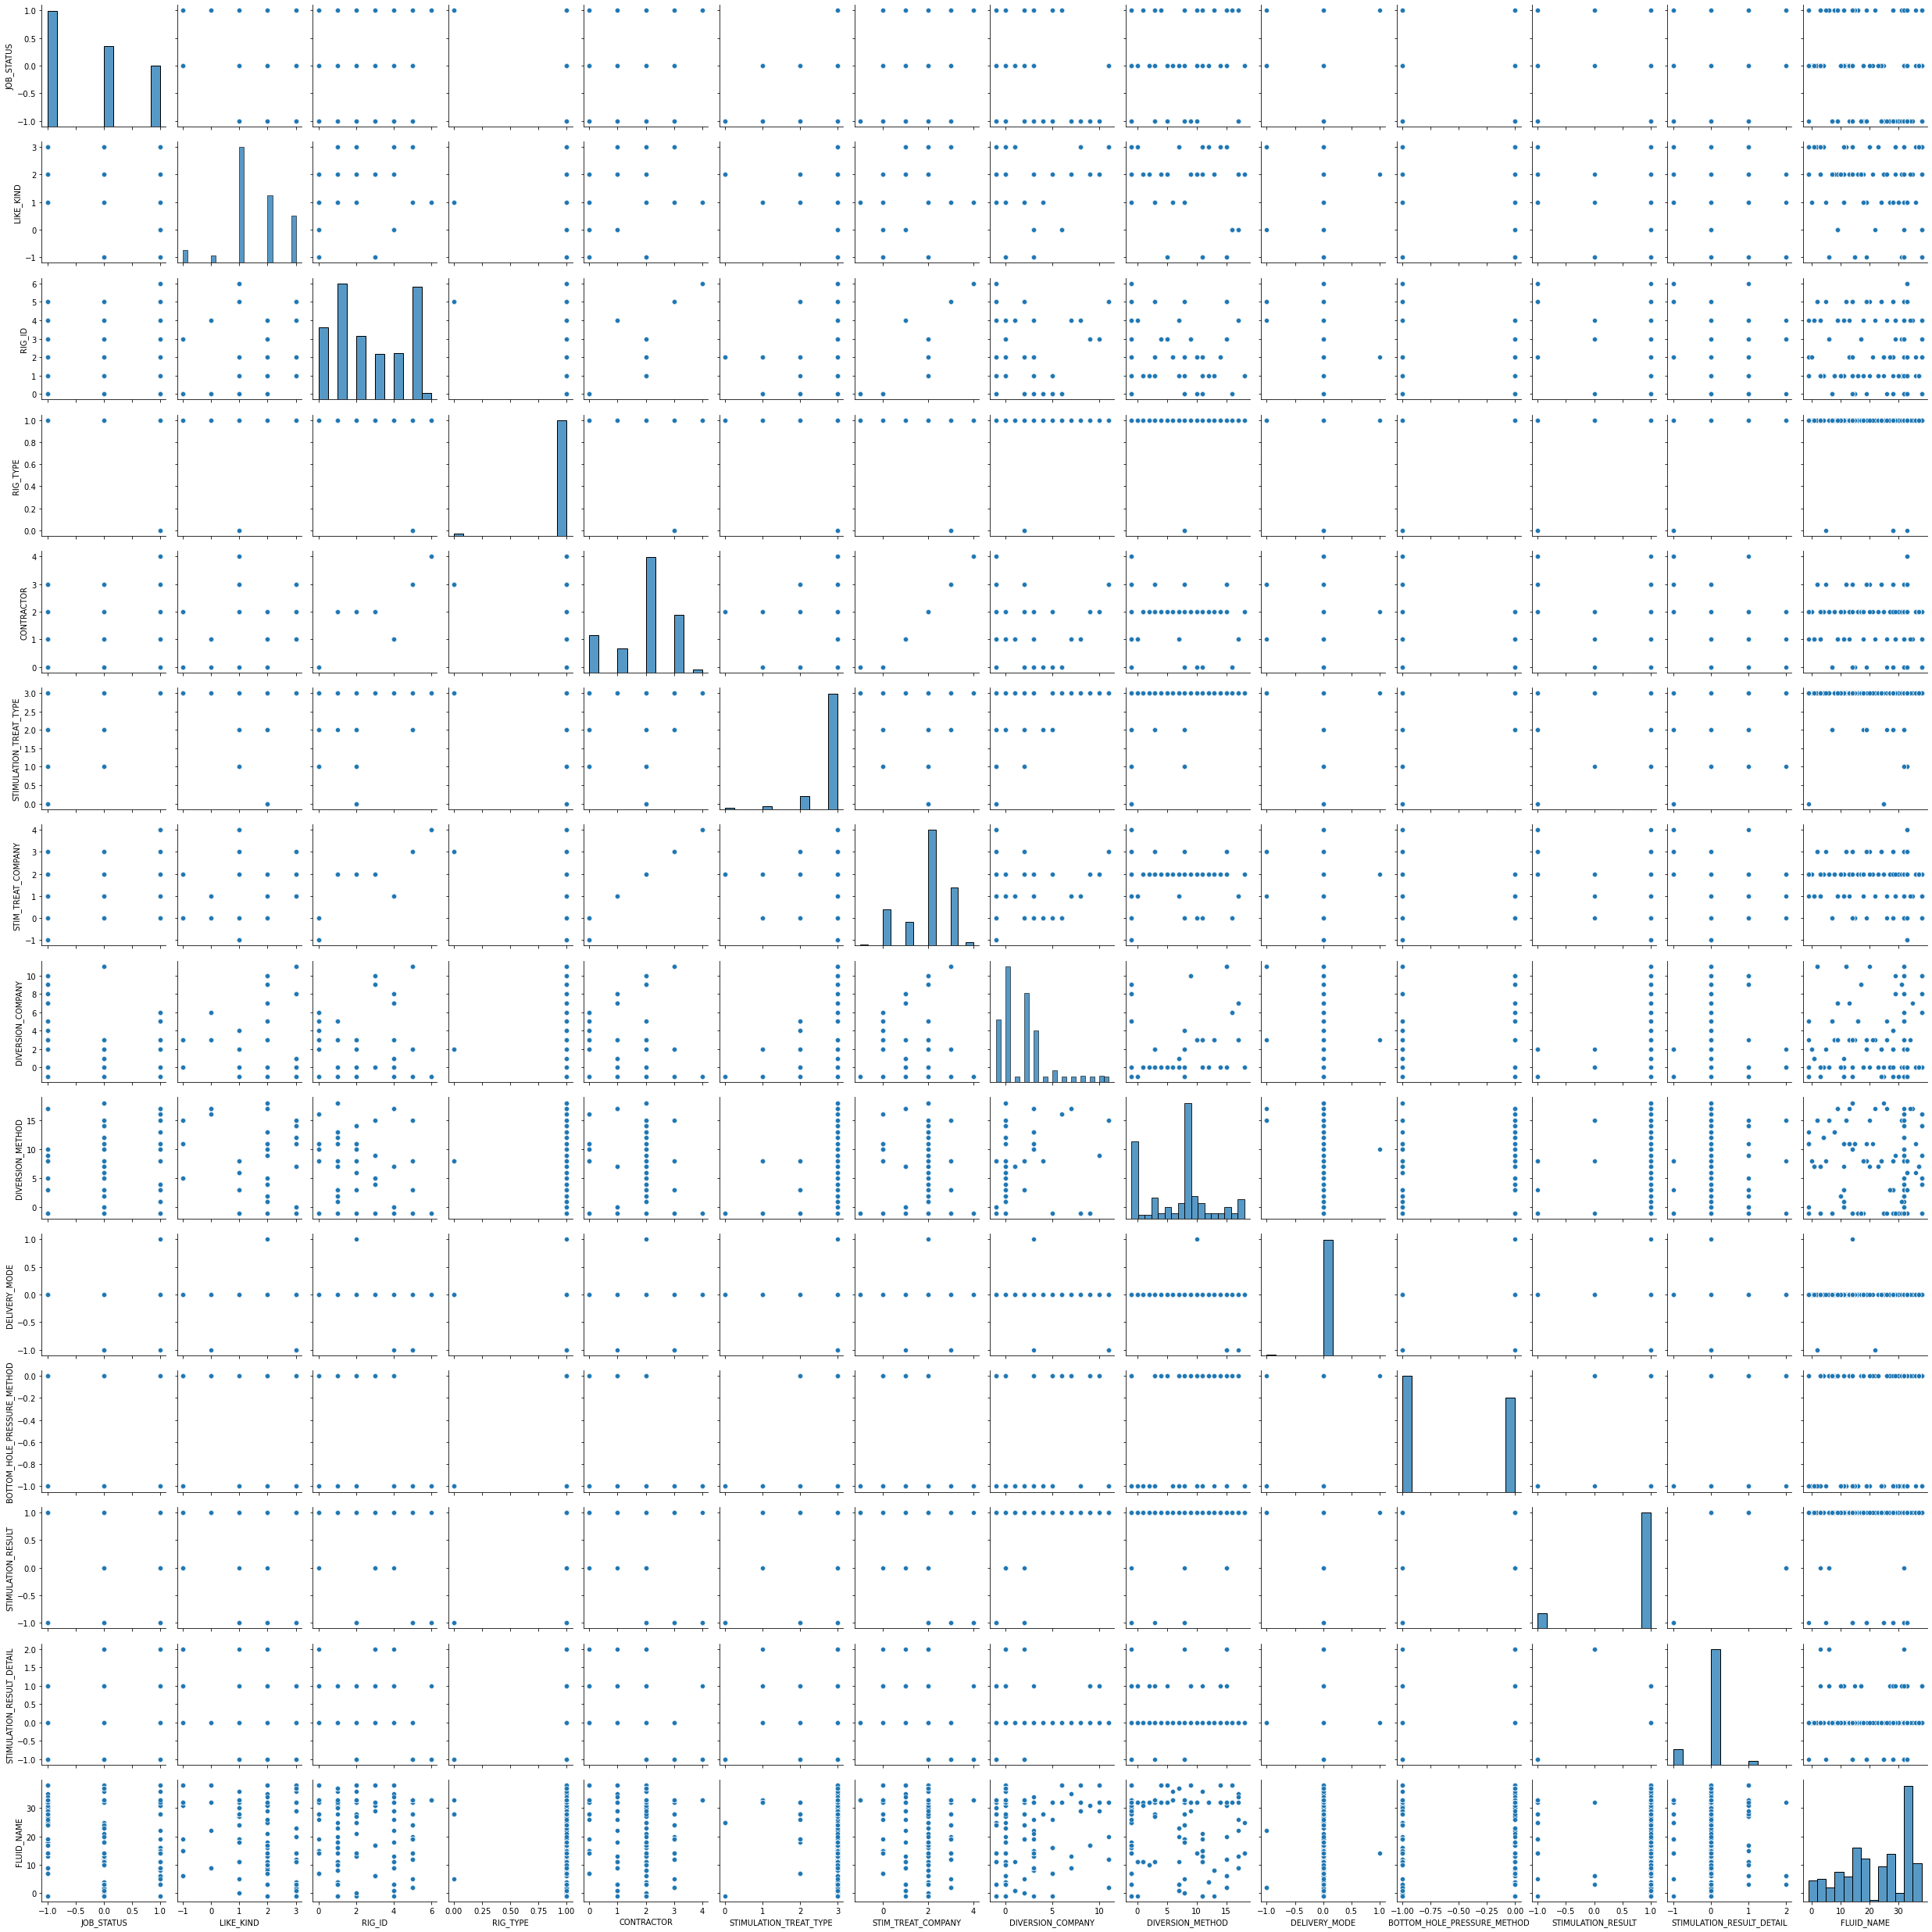

In [37]:
g = sns.pairplot(cat_features)

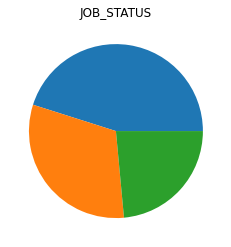

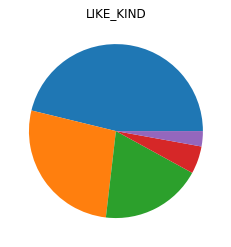

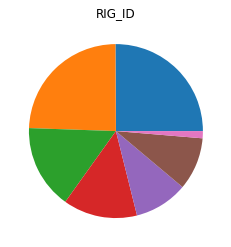

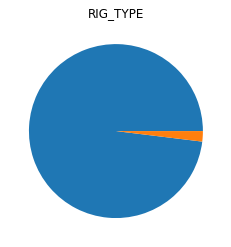

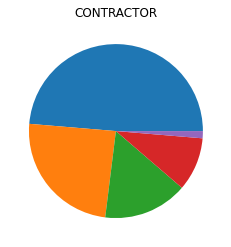

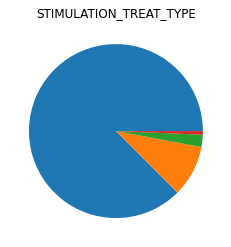

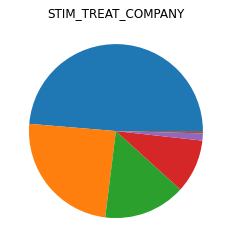

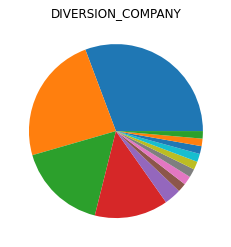

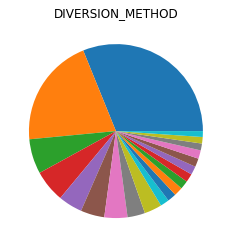

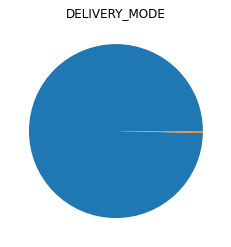

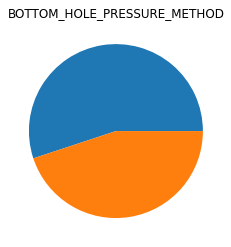

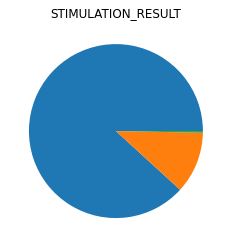

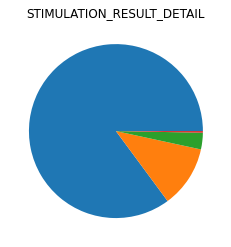

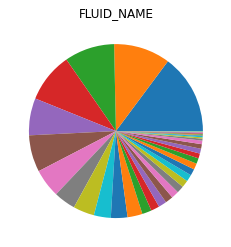

In [38]:
chart_count = 0
for feature in cat_features:
    cur_feature = pd.Series(cat_features[feature].to_list())
    cur_counts = cur_feature.value_counts().to_frame()[0].to_list()
    plt.title(feature)
    plt.pie(cur_counts)
    plt.show()
    chart_count += 1

In [39]:
chart_count

14